In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, find_peaks_cwt, ricker, cwt
import matplotlib.pyplot as plt
from scipy.signal import correlate

# mat = scipy.io.loadmat('helpers/data/NMR_mix_DoE.mat')

# X = mat.get('xData')
# targets = mat.get('yData')
# target_labels = mat.get('yLabels')
# axis = mat.get("Axis")
X  = pd.read_csv("X_duplet.csv").to_numpy()

In [2]:
peaks, properties = find_peaks(X[1], height=0)
print(peaks)
print(properties)

[ 501 1501 3507 4493 7500 8500]
{'peak_heights': array([7.55665359e-05, 8.73491868e-05, 7.73703843e-04, 7.73929205e-04,
       1.97274490e-03, 1.96823112e-03])}


"the ideal wavelet function should resemble the shapes of true peaks"
https://academic.oup.com/bioinformatics/article/28/7/914/210737?login=false

should be more robusts

In [52]:
#Wavelet function

def gauss2(length, variance):
    mean = length/2
    x = np.linspace(0,length,length)
    return 1/(variance*np.sqrt(2*np.pi))*np.exp(-1/2*((x-mean)/variance)**2)

def pascal(x):
    triangle = []
    for i in range(x):
        row = [1]
        if i > 0:
            prev_row = triangle[-1]
            for j in range(len(prev_row) - 1):
                row.append(prev_row[j] + prev_row[j + 1])
            row.append(1)
        triangle.append(row)
    return triangle[-1]

def lorentzian(x, mean, variance):
    return 1 / (np.pi * variance * (1 + ((x - mean) / variance) ** 2))
def gauss(x, mean, variance):
    return 1/(variance*np.sqrt(2*np.pi))*np.exp(-1/2*((x-mean)/variance)**2)

def multiplet(length, sigma, mult=2):
    mean = length/2
    #mult = kwargs.get('mult')
    x = np.linspace(0,length,length)
    spacing = 1000
    type='lorentz'
    triangle = pascal(mult)
    t_max = max(triangle)
    triangle = [t/t_max for t in triangle]
    y = np.zeros(len(x),dtype=float)
    
    if len(triangle)%2 == 0:
        space = -1*len(triangle)/2*spacing+spacing/2
    else:
        space = -1*(len(triangle)-1)/2*spacing
    for i,size in enumerate(triangle):
        if type == 'lorentz':
            y += lorentzian(x, mean+space, sigma)*size
        else:
            y += gauss(x, mean+space, sigma)*size
        space +=  spacing
    return y

def streg(length, width):
    mean = length/2
    x = np.zeros(length)

    x[int(length/3)] = 0.5
    x[int(length*2/3)] = 0.5
    return x



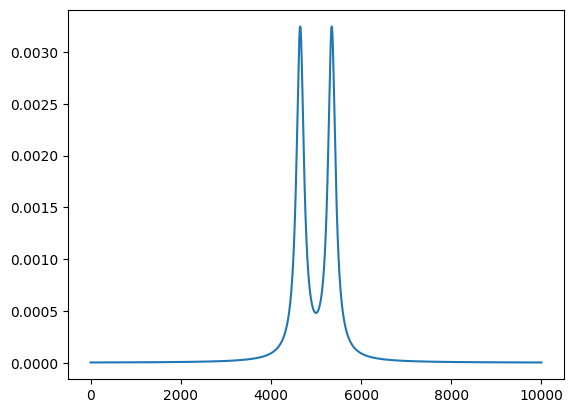

In [18]:
plt.plot(multiplet(10000,100))
plt.show()

In [58]:
def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

[  500  1500  3499  4502  7500  8501 10756 10759 10767 10772 10775 10779
 10781 10791 10793 10818 10823 10826 10831 10835 10840 10844 10849 10852
 10860 10865 10870 10878 10884 10897 10901 10913 10922 10924 10929 10934
 10939 10948 10966 10982 10998]


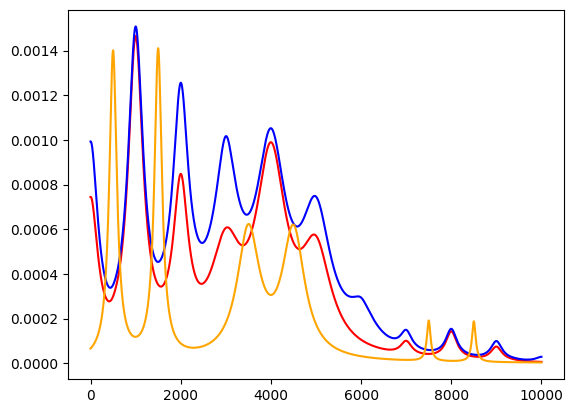

In [64]:
# plt.plot(cwt(X[8], widths=[100], wavelet=multiplet, mult=2)[0])
# plt.plot(cwt(X[8], widths=[100], wavelet=multiplet, mult=2)[0])
plt.plot(correlate(X[8],multiplet(len(X[8]),100, mult=2), mode='same'),color="red")
plt.plot(correlate(X[8],multiplet(len(X[8]),100, mult=4), mode='same'),color="blue")
# plt.plot(n(X[8],multiplet(len(X[8]),100, mult=2), mode='same')/10,color="red")
# plt.plot(np.correlate(X[8],multiplet(len(X[8]),100, mult=4), mode='same'),color="blue")
#plt.plot(cwt(X[8], widths=[100], wavelet=multiplet, mult=4)[0])
#plt.plot(cwt(X[8], widths=[100], wavelet=multiplet, mult=2)[0])
plt.plot(X[8],color="orange")
#peaks = find_peaks_cwt(X[1],[1],wavelet=multiplet)
print(peaks)

[  72 1008 1962 3152 4001 4849 7051 8000 8950]


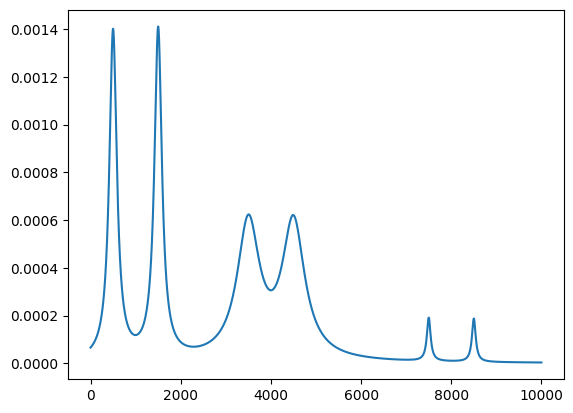

In [65]:
#plt.plot(cwt(X[8], widths=[100], wavelet=multiplet)[0])
plt.plot(X[8])
peaks = find_peaks_cwt(X[1],[100],wavelet=multiplet)
print(peaks)

In [63]:

peaks = find_peaks_cwt(np.concatenate((X[1]),[1000])
print(peaks)


[  500  1500  3499  4502  7500  8501 10756 10759 10767 10772 10775 10779
 10781 10791 10793 10818 10823 10826 10831 10835 10840 10844 10849 10852
 10860 10865 10870 10878 10884 10897 10901 10913 10922 10924 10929 10934
 10939 10948 10966 10982 10998]


In [8]:
def distances(peak, peaks):
    return [peak2-peak for peak2 in peaks]

peak_distances = []

for peak in peaks:
    peak_distances.append(distances(peak,peaks))

peak_distances = np.array(peak_distances)
peak_distances

array([[    0,  1000,  3006,  3992,  6999,  7999],
       [-1000,     0,  2006,  2992,  5999,  6999],
       [-3006, -2006,     0,   986,  3993,  4993],
       [-3992, -2992,  -986,     0,  3007,  4007],
       [-6999, -5999, -3993, -3007,     0,  1000],
       [-7999, -6999, -4993, -4007, -1000,     0]], dtype=int64)